## Data Analysis: Airbnb - Munich ##

In this notebook I analyse data from a Airbnb dataset about Munich. The objective is to find interesting insights in the data and also use modells to predict important variables. 

The first step to the Data Science Process is to develop a Business Understanding. As Airbnb is commonly used it can be said that the price is a key driver for both hosts and visitors. Therefore it is necessary to understand what other variables influences the price as one of the most important questions a Airbnb owner has, is to determine an optimal price for his location. For investigation I use descriptive and inferential statistics and built a model to predict variables that are the key driver of the price. After that the question of how to gain good reviews in Munich will be adressed as reviews are one of the major sources for visitors to investigate if a location is trustful. Las but not least the focus will be on the visitor and the analysis whether a underrated renting object can be determined. With this in mind it is the objective to find locations that have strong predicting variables but a price below average.

After understanding the Airbnb Business the development of a Data understanding and its preparation is necessary. For this analysis I will follow these steps:
<ol>
<li>Explaratory Data Analysis</li>
<li>Data Wrangling and Cleaning</li>
</ol>
When the data is ready for analysis purposes I will do the following tasks to find the insights:
<ol>
<li>Descriptive Statistics</li>
<li>Data Visualization</li>
<li>Data Modelling</li>
</ol>
To finish this analysis the results will be sumarized and published in a medium blog post.

### Exploratory Data Analysis ###

In [922]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [923]:
# explore listings
listings = pd.read_csv('listings.csv.gz', compression='gzip', error_bad_lines=False)

In [924]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20210322162337,2021-03-23,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele internationale Gäste!...,NaN,NaN,NaN,t,https://a0.muscache.com/im/users/517685/profil...,https://a0.muscache.com/im/users/517685/profil...,Hadern,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Munich, Bavaria, Germany",Hadern,NaN,48.11476,11.48782,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Refrige...",$80.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,1,1,1,5,2021-03-23,129,0,0,2011-10-03,2019-10-03,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,1.12
1,114695,https://www.airbnb.com/rooms/114695,20210322162337,2021-04-02,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to meet interesting peopl...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/581737/profil...,https://a0.muscache.com/im/users/581737/profil...,Berg am Laim,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Berg am Laim,NaN,48.12071,11.63758,Entire apartment,Entire home/apt,5,NaN,1 bath,1.0,3.0,"[""Microwave"", ""Kitchen"", ""Bed linens"", ""Dryer""...",$95.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,30,60,90,169,2021-04-02,53,0,0,2011-07-08,2019-10-06,95.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,0.45
2,127383,https://www.airbnb.com/rooms/127383,20210322162337,2021-04-01,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja und ich freue mich net...",a few days or more,0%,85%,t,https://a0.muscache.com/im/users/630556/profil...,https://a0.muscache.com/im/users/630556/profil...,Maxvorstadt,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,NaN,Maxvorstadt,NaN,48.15199,11.56482,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Bed linens"", ""TV"", ""Refrigerat...",$99.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,2021-04-01,94,10,0,2011-06-04,2020-12-30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.79
3,159634,https://www.airbnb.com/rooms/159634,20210322162337,2021-0

In [925]:
# explore listings short
listings_short = pd.read_csv('listings.csv')

In [926]:
listings_short.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,129,2019-10-03,1.12,2,5
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.12071,11.63758,Entire home/apt,95,2,53,2019-10-06,0.45,2,169
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15199,11.56482,Entire home/apt,99,2,94,2020-12-30,0.79,1,0
3,159634,"Fancy, bright central roof top flat",765694,Sanna,NaN,Pasing-Obermenzing,48.13898,11.46612,Entire home/apt,52,5,34,2020-12-23,0.29,1,0
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,NaN,Sendling-Westpark,48.10814,11.52733,Private room,55,2,478,2020-11-13,4.12,1,275


In [927]:
listings_short.shape

(5073, 16)

In [928]:
listings_short.room_type.value_counts()

Entire home/apt    2853
Private room       2077
Shared room          80
Hotel room           63
Name: room_type, dtype: int64

In [929]:
# get the relevant columns out of listings_short
daten = listings_short[['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

In [930]:
# explore the reviews data
reviews = pd.read_csv('reviews.csv.gz', compression='gzip', error_bad_lines=False)

In [931]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,97945,591337,2011-10-03,508190,Lauren,We very much enjoyed staying at Angelika's apa...
1,97945,796084,2011-12-20,341171,Marty & Evelyn,"Angelika was a very gracious host, and went ou..."
2,97945,964528,2012-03-02,1647967,Sue,The apartment was beautiful and Angelika provi...
3,97945,1353862,2012-05-26,2414638,Mel And George,We loved the warm welcome and was pleasantly s...
4,97945,1375610,2012-05-29,2323197,Anais,"Dès notre arrivée, notre hote nous a cordialem..."


In [932]:
reviews.shape

(108242, 6)

In [933]:
# explore the calendars data
calendar = pd.read_csv('calendar.csv.gz', compression='gzip', error_bad_lines=False)

In [934]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,710604,2021-03-23,t,$39.00,$39.00,1.0,1125.0
1,710604,2021-03-24,t,$39.00,$39.00,1.0,1125.0
2,710604,2021-03-25,t,$39.00,$39.00,1.0,1125.0
3,710604,2021-03-26,t,$39.00,$39.00,1.0,1125.0
4,710604,2021-03-27,t,$39.00,$39.00,1.0,1125.0


In [935]:
calendar[calendar.listing_id==710604]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,710604,2021-03-23,t,$39.00,$39.00,1.0,1125.0
1,710604,2021-03-24,t,$39.00,$39.00,1.0,1125.0
2,710604,2021-03-25,t,$39.00,$39.00,1.0,1125.0
3,710604,2021-03-26,t,$39.00,$39.00,1.0,1125.0
4,710604,2021-03-27,t,$39.00,$39.00,1.0,1125.0
5,710604,2021-03-28,t,$39.00,$39.00,1.0,1125.0
6,710604,2021-03-29,t,$39.00,$39.00,1.0,1125.0
7,710604,2021-03-30,t,$39.00,$39.00,1.0,1125.0
8,710604,2021-03-31,t,$39.00,$39.00,1.0,1125.0
9,710604,2021-04-01,t,$39.00,$39.00,1.0,1125.0


In [936]:
calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [937]:
calendar.available.value_counts()

f    1029806
t     819310
Name: available, dtype: int64

In [938]:
#explre the neighbourhoods data
neighbourhoods = pd.read_csv('neighbourhoods.csv')

In [939]:
neighbourhoods.head(5)

,neighbourhood_group,neighbourhood
0,NaN,Allach-Untermenzing
1,NaN,Altstadt-Lehel
2,NaN,Aubing-Lochhausen-Langwied
3,NaN,Au-Haidhausen
4,NaN,Berg am Laim


### Data Wrangling & Cleaning ###

In [940]:
pd.set_option('display.max_columns', 500)

In [941]:
### clean the listings dataset
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20210322162337,2021-03-23,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele internationale Gäste!...,NaN,NaN,NaN,t,https://a0.muscache.com/im/users/517685/profil...,https://a0.muscache.com/im/users/517685/profil...,Hadern,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Munich, Bavaria, Germany",Hadern,NaN,48.11476,11.48782,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Essentials"", ""Refrige...",$80.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,1,1,1,5,2021-03-23,129,0,0,2011-10-03,2019-10-03,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,1.12
1,114695,https://www.airbnb.com/rooms/114695,20210322162337,2021-04-02,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to meet interesting peopl...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/581737/profil...,https://a0.muscache.com/im/users/581737/profil...,Berg am Laim,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Berg am Laim,NaN,48.12071,11.63758,Entire apartment,Entire home/apt,5,NaN,1 bath,1.0,3.0,"[""Microwave"", ""Kitchen"", ""Bed linens"", ""Dryer""...",$95.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,30,60,90,169,2021-04-02,53,0,0,2011-07-08,2019-10-06,95.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,0.45
2,127383,https://www.airbnb.com/rooms/127383,20210322162337,2021-04-01,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja und ich freue mich net...",a few days or more,0%,85%,t,https://a0.muscache.com/im/users/630556/profil...,https://a0.muscache.com/im/users/630556/profil...,Maxvorstadt,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,NaN,Maxvorstadt,NaN,48.15199,11.56482,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Bed linens"", ""TV"", ""Refrigerat...",$99.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,2021-04-01,94,10,0,2011-06-04,2020-12-30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.79
3,159634,https://www.airbnb.com/rooms/159634,20210322162337,2021-0

In [942]:
listings.columns[0]

'id'

In [943]:
# check for the correct datatype 

name = []
for x in range(74):
    name.append(listings.columns[x])
    
dtype = []
for x in range(74):
    dtype.append(listings.dtypes[x])
    
data = {'name': name, 'dtype': dtype}


In [944]:
d = pd.DataFrame(data)

In [945]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [946]:
d.head(70)

,name,dtype
0,id,int64
1,listing_url,object
2,scrape_id,int64
3,last_scraped,object
4,name,object
5,description,object
6,neighborhood_overview,object
7,picture_url,object
8,host_id,int64
9,host_url,object


last_scraped	object to datetime
host_since	object to datetime
host_response_rate	object to float
host_acceptance_rate	object to float
price	object to float
calendar_last_scraped	object to datetime

### Predicting the price of an AirBnB ###

In [947]:
# Build a dataset for the price - first try
# select the most relevant columns
df = listings[['id', 'price', 'host_since', 'neighbourhood_cleansed', 'property_type', 'bedrooms', 'beds', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'latitude', 'longitude']]

In [948]:
df.head()

,id,price,host_since,neighbourhood_cleansed,property_type,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
0,97945,$80.00,2011-04-18,Hadern,Entire apartment,1.0,1.0,5,129,97.0,10.0,10.0,10.0,10.0,9.0,9.0,48.11476,11.48782
1,114695,$95.00,2011-05-12,Berg am Laim,Entire apartment,1.0,3.0,169,53,95.0,9.0,10.0,10.0,10.0,9.0,9.0,48.12071,11.63758
2,127383,$99.00,2011-05-26,Maxvorstadt,Entire apartment,1.0,1.0,0,94,98.0,10.0,10.0,10.0,10.0,10.0,10.0,48.15199,11.56482
3,159634,$52.00,2011-07-01,Pasing-Obermenzing,Entire apartment,1.0,1.0,0,34,93.0,10.0,9.0,9.0,10.0,9.0,9.0,48.13898,11.46612
4,170154,$55.00,2010-04-14,Sendling-Westpark,Private room in house,1.0,2.0,275,478,99.0,10.0,10.0,10.0,10.0,10.0,10.0,48.10814,11.52733


In [949]:
df.dtypes

id                               int64
price                           object
host_since                      object
neighbourhood_cleansed          object
property_type                   object
bedrooms                       float64
beds                           float64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
latitude                       float64
longitude                      float64
dtype: object

In [950]:
# make the price value accessable and check
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,price,host_since,neighbourhood_cleansed,property_type,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
0,97945,80.00,2011-04-18,Hadern,Entire apartment,1.0,1.0,5,129,97.0,10.0,10.0,10.0,10.0,9.0,9.0,48.11476,11.48782
1,114695,95.00,2011-05-12,Berg am Laim,Entire apartment,1.0,3.0,169,53,95.0,9.0,10.0,10.0,10.0,9.0,9.0,48.12071,11.63758


In [951]:
df['price'] = df['price'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [952]:
df.describe()

,id,price,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
count,5.073000e+03,5073.000000,4489.000000,4993.000000,5073.000000,5073.000000,3739.000000,3737.000000,3738.000000,3736.000000,3737.000000,3737.000000,3737.000000,5073.000000,5073.000000
mean,2.792655e+07,113.464419,1.252840,1.601242,157.114331,21.336882,94.727200,9.667380,9.486624,9.748662,9.785122,9.639283,9.260102,48.140407,11.566271
std,1.441428e+07,274.349634,1.232184,1.800055,136.368872,52.070614,8.251331,0.821869,0.962757,0.744276,0.692661,0.727215,0.976597,0.026445,0.047029
min,9.794500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,48.068870,11.385190
25%,1.666146e+07,50.000000,1.000000,1.000000,29.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,48.122780,11.540350
50%,3.080607e+07,79.000000,1.000000,1.000000,90.000000,4.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,48.137750,11.566420
75%,3.908107e+07,120.000000,1.000000,2.000000,297.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,48.157990,11.588140
max,4.879783e+07,10762.000000,50.000000,50.000000,365.000000,720.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,48.229500,11.710050


In [953]:
df.dtypes

id                               int64
price                          float64
host_since                      object
neighbourhood_cleansed          object
property_type                   object
bedrooms                       float64
beds                           float64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
latitude                       float64
longitude                      float64
dtype: object

In [954]:
# make host since accessable
df['host_since'] =  pd.to_datetime(df['host_since'], format='%Y-%m-%d')
df.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id                                      int64
price                                 float64
host_since                     datetime64[ns]
neighbourhood_cleansed                 object
property_type                          object
bedrooms                              float64
beds                                  float64
availability_365                        int64
number_of_reviews                       int64
review_scores_rating                  float64
review_scores_accuracy                float64
review_scores_cleanliness             float64
review_scores_checkin                 float64
review_scores_communication           float64
review_scores_location                float64
review_scores_value                   float64
latitude                              float64
longitude                             float64
dtype: object

In [955]:
# check for the price per neighbourhood
df.groupby('neighbourhood_cleansed').price.mean().sort_values()

neighbourhood_cleansed
Moosach                                                    75.776000
Hadern                                                     77.322034
Milbertshofen-Am Hart                                      77.680203
Ramersdorf-Perlach                                         82.057018
Aubing-Lochhausen-Langwied                                 85.658537
Untergiesing-Harlaching                                    85.841270
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln     85.859729
Allach-Untermenzing                                        87.760870
Pasing-Obermenzing                                         89.511811
Sendling-Westpark                                          91.344086
Laim                                                       91.971831
Berg am Laim                                               94.264151
Schwabing-West                                            100.778711
Neuhausen-Nymphenburg                                     101.839465
Schwabing-F

In [956]:
#check the neighbourhood value counts
df.neighbourhood_cleansed.value_counts()

Ludwigsvorstadt-Isarvorstadt                              563
Maxvorstadt                                               420
Schwabing-West                                            357
Schwabing-Freimann                                        316
Au-Haidhausen                                             314
Neuhausen-Nymphenburg                                     299
Bogenhausen                                               246
Ramersdorf-Perlach                                        228
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    221
Milbertshofen-Am Hart                                     197
Tudering-Riem                                             190
Sendling-Westpark                                         186
Obergiesing                                               181
Altstadt-Lehel                                            178
Sendling                                                  174
Schwanthalerhöhe                                          162
Laim    

In [957]:
# check the poperty type price statistics
df.groupby('property_type').price.mean().sort_values()

property_type
Shared room in bed and breakfast        18.000000
Private room in barn                    25.000000
Private room in bungalow                25.000000
Shared room in loft                     40.500000
Private room in guesthouse              42.000000
Room in bed and breakfast               47.000000
Shared room in igloo                    50.000000
Private room in guest suite             50.200000
Shared room in condominium              50.750000
Private room in townhouse               56.729167
Shared room in tent                     60.000000
Shared room in house                    60.000000
Entire home/apt                         65.500000
Shared room in tipi                     70.000000
Entire place                            71.000000
Private room in villa                   80.000000
Private room in camper/rv               80.000000
Entire hostel                           80.000000
Shared room in guesthouse               80.000000
Private room in apartment           

In [958]:
#check the portperty type value counts
df.property_type.value_counts()

Entire apartment                      2455
Private room in apartment             1496
Private room in house                  188
Room in hotel                          132
Entire serviced apartment              132
Entire condominium                      86
Entire loft                             79
Room in boutique hotel                  64
Shared room in apartment                63
Private room in condominium             49
Private room in townhouse               48
Entire house                            42
Private room in serviced apartment      39
Private room in hostel                  31
Room in serviced apartment              20
Private room in bed and breakfast       15
Private room in loft                    15
Room in aparthotel                      13
Entire townhouse                        11
Entire guest suite                      10
Camper/RV                                8
Hut                                      7
Private room in tent                     6
Private roo

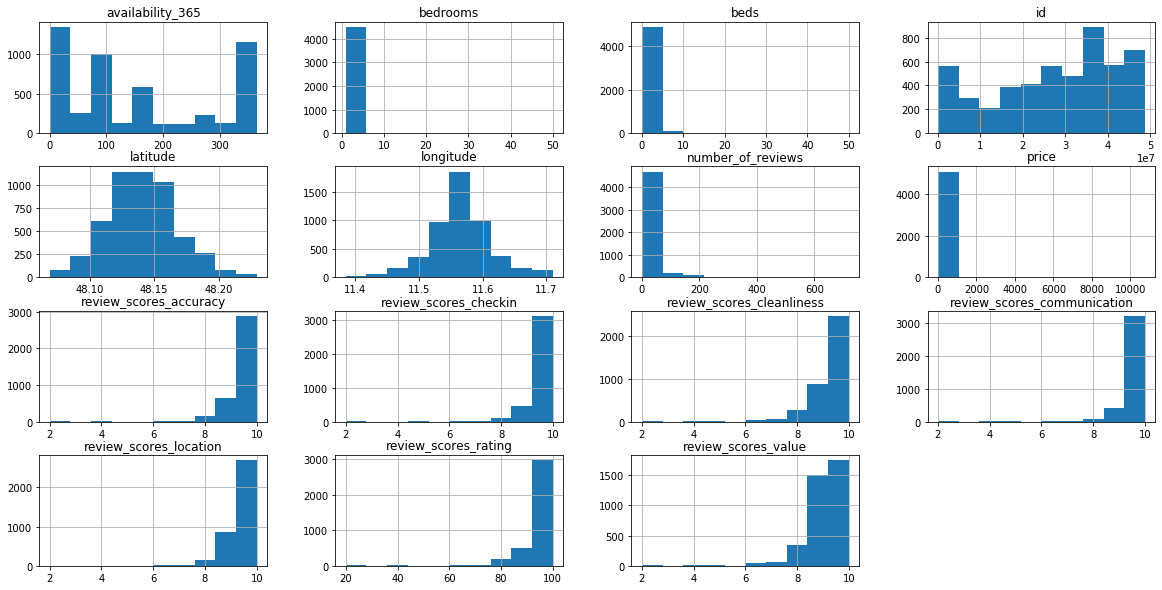

In [959]:
#get some overview about the other data
df.hist(figsize=(20,10));

In [960]:
# check if the price varies for certain reviews
df.groupby('review_scores_value').price.mean()

review_scores_value
2.0      90.800000
4.0     209.125000
5.0      63.571429
6.0     133.960000
7.0     152.290909
8.0     182.487032
9.0     102.118430
10.0     95.348174
Name: price, dtype: float64

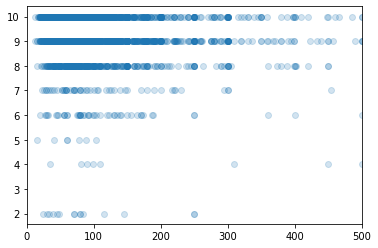

In [961]:
# check if there is a relation between price an review
x = df.price
y = df.review_scores_value

plt.xlim([0, 500])
plt.scatter(x, y, alpha=0.2)
plt.show()

In [962]:
df['price'].corr(df['review_scores_value'])

-0.05780828746758244

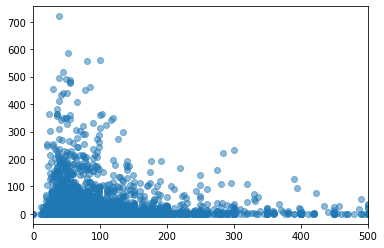

In [963]:
# check relation between price and number of reviews
x = df.price
y = df.number_of_reviews

plt.xlim([0, 500])
plt.scatter(x, y, alpha=0.5)
plt.show()

In [964]:
df['price'].corr(df['number_of_reviews'])

-0.04594280075060044

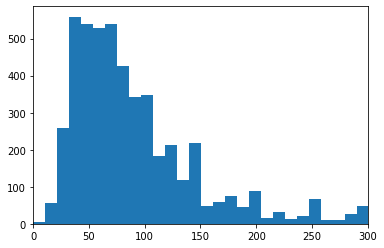

In [965]:
# see relevant price distribution
plt.hist(df.price, bins=1000)
plt.xlim([0, 300])
plt.show()

In [966]:
#check how much data points I loose when deleting outliers of the price
df[df.price<=190].id.count()

4548

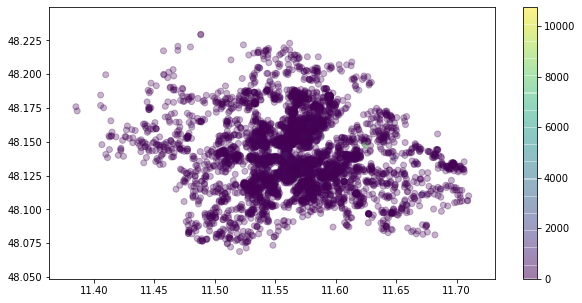

In [967]:
# investigate the price depending on location visually
plt.figure(figsize=(10,5))
plt.scatter(data = df, x = 'longitude', y = 'latitude', c = 'price', alpha = 0.3);
plt.colorbar();

After inspecting the data I need to clean the price column as there are some outliers which could harm our model
Our IQR is 120-50 = 70, for detection of outliers I use the formula Q1-1,5 IQR ; Q3+1,5IQR which is 0 to 190,
which this I would exclude around 500 values.

In [968]:
df.price.describe()

count     5073.000000
mean       113.464419
std        274.349634
min          0.000000
25%         50.000000
50%         79.000000
75%        120.000000
max      10762.000000
Name: price, dtype: float64

In [969]:
df[df.price<=190].id.count()

4548

In [970]:
df[df.price<=10].id.count()

5

In [971]:
df = df[df.price <= 190]
df = df[df.price >= 10]

In [972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4544 entries, 0 to 5072
Data columns (total 18 columns):
id                             4544 non-null int64
price                          4544 non-null float64
host_since                     4405 non-null datetime64[ns]
neighbourhood_cleansed         4544 non-null object
property_type                  4544 non-null object
bedrooms                       3997 non-null float64
beds                           4472 non-null float64
availability_365               4544 non-null int64
number_of_reviews              4544 non-null int64
review_scores_rating           3405 non-null float64
review_scores_accuracy         3403 non-null float64
review_scores_cleanliness      3404 non-null float64
review_scores_checkin          3402 non-null float64
review_scores_communication    3403 non-null float64
review_scores_location         3403 non-null float64
review_scores_value            3403 non-null float64
latitude                       4544 non-null f

### Building the modell for predicting the price

In order to not overfit the modell I choose the following variables as their are from special interest in my opinion:
neighbourhood, property_type, beds, number of reviews and review score values 

In [973]:
data = df[['price', 'neighbourhood_cleansed', 'property_type', 'beds', 'number_of_reviews', 'review_scores_value']]
data_new = df[['price', 'neighbourhood_cleansed', 'property_type', 'beds', 'number_of_reviews', 'review_scores_value']]

In [974]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4544 entries, 0 to 5072
Data columns (total 6 columns):
price                     4544 non-null float64
neighbourhood_cleansed    4544 non-null object
property_type             4544 non-null object
beds                      4472 non-null float64
number_of_reviews         4544 non-null int64
review_scores_value       3403 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 248.5+ KB


In [975]:
data.describe()

,price,beds,number_of_reviews,review_scores_value
count,4544.000000,4472.000000,4544.000000,3403.000000
mean,78.481734,1.479651,22.590009,9.285043
std,38.439253,1.561829,54.126341,0.952349
min,10.000000,0.000000,0.000000,2.000000
25%,49.000000,1.000000,1.000000,9.000000
50%,70.000000,1.000000,4.000000,9.000000
75%,100.000000,2.000000,19.000000,10.000000
max,190.000000,50.000000,720.000000,10.000000


In [976]:
num_vars = data.select_dtypes(include=['float', 'int']).columns

In [977]:
# impute the data with the mean value - numeric values
for col in num_vars:
    data[col].fillna((data[col].mean()), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [978]:
data.describe()

,price,beds,number_of_reviews,review_scores_value
count,4544.000000,4544.000000,4544.000000,4544.000000
mean,78.481734,1.479651,22.590009,9.285043
std,38.439253,1.549403,54.126341,0.824123
min,10.000000,0.000000,0.000000,2.000000
25%,49.000000,1.000000,1.000000,9.000000
50%,70.000000,1.000000,4.000000,9.285043
75%,100.000000,2.000000,19.000000,10.000000
max,190.000000,50.000000,720.000000,10.000000


In [979]:
# Dummy the categorical variables
cat_vars = data.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    data = pd.concat([data.drop(var, axis=1), pd.get_dummies(data[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [980]:
X = data.drop(['price'], axis=1)

In [981]:
y = data['price']

In [982]:
X.shape

(4544, 76)

In [983]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
print(r2_score(y_test, y_test_preds), len(y_test))

-1.13608391916468e+25 1364


In [984]:
def coef_weights(coefficients, X_train):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(5)

,est_int,coefs,abs_coefs
36,property_type_Entire hostel,4.755306e+15,4.755306e+15
29,property_type_Earth house,2.354268e+15,2.354268e+15
28,property_type_Cave,6.688636e+14,6.688636e+14
57,property_type_Private room in tent,6.688636e+14,6.688636e+14
41,property_type_Entire townhouse,6.688636e+14,6.688636e+14


This model did not work so I try to change some inputs to get a better result for the r2. Some investigation showed that especially the property type is harming the model. So I want to explore this variable more

In [985]:
data_new.property_type.value_counts()

Entire apartment                      2119
Private room in apartment             1436
Private room in house                  180
Room in hotel                          126
Entire serviced apartment              116
Entire condominium                      73
Shared room in apartment                59
Entire loft                             58
Private room in condominium             48
Private room in townhouse               48
Room in boutique hotel                  47
Private room in serviced apartment      35
Entire house                            29
Private room in hostel                  22
Room in serviced apartment              20
Private room in loft                    14
Private room in bed and breakfast       13
Room in aparthotel                      13
Entire guest suite                       9
Hut                                      7
Camper/RV                                7
Entire townhouse                         5
Private room in guest suite              5
Private roo

In order to better fit the data I will remove all rows that contain a property type with value counts less than 10

In [986]:
sub_df = data_new[df.groupby('property_type').property_type.transform('count')>10].copy() 


In [987]:
sub_df.head()

,price,neighbourhood_cleansed,property_type,beds,number_of_reviews,review_scores_value
0,80.0,Hadern,Entire apartment,1.0,129,9.0
1,95.0,Berg am Laim,Entire apartment,3.0,53,9.0
2,99.0,Maxvorstadt,Entire apartment,1.0,94,10.0
3,52.0,Pasing-Obermenzing,Entire apartment,1.0,34,9.0
4,55.0,Sendling-Westpark,Private room in house,2.0,478,10.0


In [988]:
sub_df.property_type.value_counts()

Entire apartment                      2119
Private room in apartment             1436
Private room in house                  180
Room in hotel                          126
Entire serviced apartment              116
Entire condominium                      73
Shared room in apartment                59
Entire loft                             58
Private room in townhouse               48
Private room in condominium             48
Room in boutique hotel                  47
Private room in serviced apartment      35
Entire house                            29
Private room in hostel                  22
Room in serviced apartment              20
Private room in loft                    14
Room in aparthotel                      13
Private room in bed and breakfast       13
Name: property_type, dtype: int64

In [989]:
# new model
def clean_data(sub_df):
    
    # Drop rows with missing salary values
    
    y = sub_df['price']

    #Drop respondent and expected salary columns
    sub_df = sub_df.drop(['price'], axis=1)
    # Fill numeric columns with the mean
    num_vars = sub_df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        sub_df[col].fillna((sub_df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = sub_df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        sub_df = pd.concat([sub_df.drop(var, axis=1), pd.get_dummies(sub_df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = sub_df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(sub_df)

In [990]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
print(r2_score(y_test, y_test_preds), len(y_test))

0.1551214247240147 1337


In [991]:
def coef_weights(coefficients, X_train):

    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
3,neighbourhood_cleansed_Altstadt-Lehel,29.810930,29.810930
33,property_type_Private room in condominium,-28.517351,28.517351
32,property_type_Private room in bed and breakfast,-24.181364,24.181364
28,property_type_Entire house,23.261020,23.261020
11,neighbourhood_cleansed_Ludwigsvorstadt-Isarvor...,21.351698,21.351698
21,neighbourhood_cleansed_Schwanthalerhöhe,19.757352,19.757352
35,property_type_Private room in house,-19.218906,19.218906
31,property_type_Private room in apartment,-19.140642,19.140642
38,property_type_Private room in townhouse,-18.451166,18.451166
36,property_type_Private room in loft,-15.940006,15.940006


#### Try to build a new model ####

In [992]:
daten = listings_short[['id', 'neighbourhood', 'latitude', 'longitude', 'price','number_of_reviews', 'reviews_per_month', 'availability_365']]
daten2 = listings[['id', 'accommodates', 'bathrooms_text', 'bedrooms','beds','host_since', 'review_scores_rating','room_type', 'host_is_superhost', 'host_listings_count', 'instant_bookable', 'host_response_time', 'host_has_profile_pic', 'host_identity_verified']]

In [993]:
## New dataset
df_new = pd.merge(daten, daten2, on='id')

In [994]:
# get a new dataset and clean the data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5073 entries, 0 to 5072
Data columns (total 21 columns):
id                        5073 non-null int64
neighbourhood             5073 non-null object
latitude                  5073 non-null float64
longitude                 5073 non-null float64
price                     5073 non-null int64
number_of_reviews         5073 non-null int64
reviews_per_month         3812 non-null float64
availability_365          5073 non-null int64
accommodates              5073 non-null int64
bathrooms_text            5054 non-null object
bedrooms                  4489 non-null float64
beds                      4993 non-null float64
host_since                4917 non-null object
review_scores_rating      3739 non-null float64
room_type                 5073 non-null object
host_is_superhost         4917 non-null object
host_listings_count       4917 non-null float64
instant_bookable          5073 non-null object
host_response_time        2473 non-null objec

In [995]:
df_new['host_since'] =  pd.to_datetime(df_new['host_since'], format='%Y-%m-%d')

In [996]:
df_new.head()

,id,neighbourhood,latitude,longitude,price,number_of_reviews,reviews_per_month,availability_365,accommodates,bathrooms_text,bedrooms,beds,host_since,review_scores_rating,room_type,host_is_superhost,host_listings_count,instant_bookable,host_response_time,host_has_profile_pic,host_identity_verified
0,97945,Hadern,48.11476,11.48782,80,129,1.12,5,2,1 bath,1.0,1.0,2011-04-18,97.0,Entire home/apt,t,1.0,f,NaN,t,t
1,114695,Berg am Laim,48.12071,11.63758,95,53,0.45,169,5,1 bath,1.0,3.0,2011-05-12,95.0,Entire home/apt,f,3.0,f,within an hour,t,t
2,127383,Maxvorstadt,48.15199,11.56482,99,94,0.79,0,4,1 bath,1.0,1.0,2011-05-26,98.0,Entire home/apt,t,2.0,f,a few days or more,t,t
3,159634,Pasing-Obermenzing,48.13898,11.46612,52,34,0.29,0,2,1 bath,1.0,1.0,2011-07-01,93.0,Entire home/apt,f,1.0,f,NaN,t,t
4,170154,Sendling-Westpark,48.10814,11.52733,55,478,4.12,275,4,1 private bath,1.0,2.0,2010-04-14,99.0,Private room,t,2.0,f,within a few hours,t,t


In [997]:
# make bathrooms accessable as numeric value
df_new['bathrooms_text'] = df_new['bathrooms_text'].replace({'[^0-9]':''}, regex=True)

In [998]:
df_new["bathrooms_text"] = pd.to_numeric(df_new["bathrooms_text"])


In [999]:
# delete price outliers
df_new = df_new[df_new.price <= 250]
df_new = df_new[df_new.price >= 10]

In [1000]:
df_new.head()

,id,neighbourhood,latitude,longitude,price,number_of_reviews,reviews_per_month,availability_365,accommodates,bathrooms_text,bedrooms,beds,host_since,review_scores_rating,room_type,host_is_superhost,host_listings_count,instant_bookable,host_response_time,host_has_profile_pic,host_identity_verified
0,97945,Hadern,48.11476,11.48782,80,129,1.12,5,2,1.0,1.0,1.0,2011-04-18,97.0,Entire home/apt,t,1.0,f,NaN,t,t
1,114695,Berg am Laim,48.12071,11.63758,95,53,0.45,169,5,1.0,1.0,3.0,2011-05-12,95.0,Entire home/apt,f,3.0,f,within an hour,t,t
2,127383,Maxvorstadt,48.15199,11.56482,99,94,0.79,0,4,1.0,1.0,1.0,2011-05-26,98.0,Entire home/apt,t,2.0,f,a few days or more,t,t
3,159634,Pasing-Obermenzing,48.13898,11.46612,52,34,0.29,0,2,1.0,1.0,1.0,2011-07-01,93.0,Entire home/apt,f,1.0,f,NaN,t,t
4,170154,Sendling-Westpark,48.10814,11.52733,55,478,4.12,275,4,1.0,1.0,2.0,2010-04-14,99.0,Private room,t,2.0,f,within a few hours,t,t


In [1001]:
# delete the property type with only a small amount of counts
#df_new = df_new[df_new.groupby('property_type').property_type.transform('count')>10].copy() 

In [1002]:
def clean_data(df_new):
    
    # Drop rows with missing salary values
    
    y = df_new['price']

    #Drop respondent and expected salary columns
    df_new = df_new.drop(['price', 'latitude', 'longitude', 'id', 'host_since'], axis=1)
    # Fill numeric columns with the mean
    num_vars = df_new.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df_new[col].fillna((df_new[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df_new.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df_new = pd.concat([df_new.drop(var, axis=1), pd.get_dummies(df_new[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df_new
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df_new)

In [1003]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
print(r2_score(y_test, y_test_preds), len(y_test), mean_squared_error(y_test, y_test_preds))

0.23104844660585244 1435 1864.1186462280182


In [1004]:
X_train.shape

(3348, 43)

In [1005]:
def coef_weights(coefficients, X_train):

    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
9,neighbourhood_Altstadt-Lehel,48.858007,48.858007
27,neighbourhood_Schwanthalerhöhe,37.719226,37.719226
17,neighbourhood_Ludwigsvorstadt-Isarvorstadt,33.600480,33.600480
35,room_type_Shared room,-33.132260,33.132260
34,room_type_Private room,-23.078705,23.078705
10,neighbourhood_Au-Haidhausen,23.038979,23.038979
18,neighbourhood_Maxvorstadt,23.038912,23.038912
38,host_response_time_within a day,-22.068243,22.068243
25,neighbourhood_Schwabing-Freimann,20.768266,20.768266
40,host_response_time_within an hour,-19.973678,19.973678


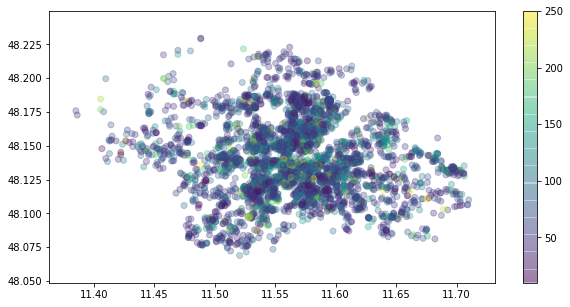

In [1006]:
# investigate the price of stations
plt.figure(figsize=(10,5))
plt.scatter(data = df_new, x = 'longitude', y = 'latitude', c = 'price', alpha = 0.3);
plt.colorbar();

In [1007]:
df_new.groupby(['neighbourhood', 'room_type']).price.mean()

neighbourhood                                           room_type      
Allach-Untermenzing                                     Entire home/apt     96.533333
                                                        Private room        75.280000
                                                        Shared room         62.000000
Altstadt-Lehel                                          Entire home/apt    123.158879
                                                        Hotel room         106.500000
                                                        Private room        99.872727
Au-Haidhausen                                           Entire home/apt     98.583815
                                                        Hotel room         137.916667
                                                        Private room        71.840708
                                                        Shared room         56.500000
Aubing-Lochhausen-Langwied                              Entire home/

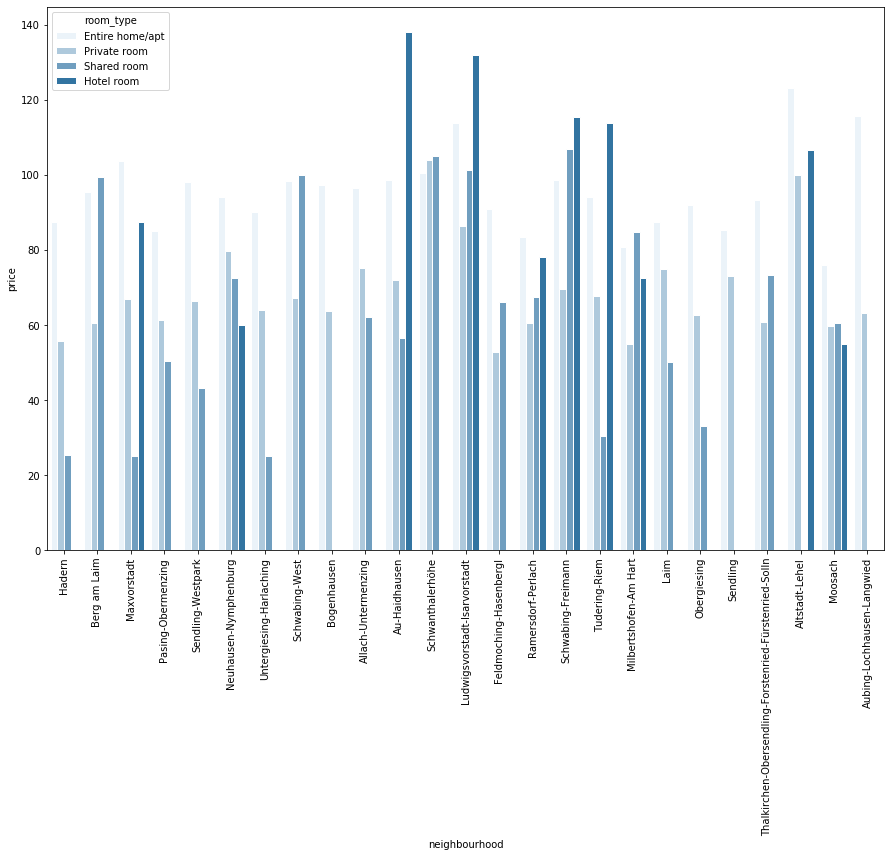

In [1008]:
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
base_color = sns.color_palette()[0]

sns.barplot( data=df_new, x="neighbourhood", y="price", hue="room_type", color=base_color,  ci=None, edgecolor="white");
plt.xticks(rotation=90);


#### Investigation of the reviews - what influences a good review? ####

In [1009]:
daten = listings_short[['id', 'neighbourhood', 'latitude', 'longitude', 'price','number_of_reviews', 'reviews_per_month', 'availability_365']]
daten2 = listings[['id', 'accommodates', 'bathrooms_text', 'bedrooms','beds','host_since', 'review_scores_rating','room_type', 'host_is_superhost', 'host_listings_count', 'instant_bookable', 'host_response_time', 'host_has_profile_pic', 'host_identity_verified', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

In [1010]:
## New dataset
df_new = pd.merge(daten, daten2, on='id')
# make bathrooms accessable as numeric value
df_new['bathrooms_text'] = df_new['bathrooms_text'].replace({'[^0-9]':''}, regex=True)
df_new["bathrooms_text"] = pd.to_numeric(df_new["bathrooms_text"])
# delete price outliers
df_new = df_new[df_new.price <= 250]
df_new = df_new[df_new.price >= 10]

In [1011]:
df_new['host_since'] =  pd.to_datetime(df_new['host_since'], format='%Y-%m-%d')


In [1012]:
df_new.head()

,id,neighbourhood,latitude,longitude,price,number_of_reviews,reviews_per_month,availability_365,accommodates,bathrooms_text,bedrooms,beds,host_since,review_scores_rating,room_type,host_is_superhost,host_listings_count,instant_bookable,host_response_time,host_has_profile_pic,host_identity_verified,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,97945,Hadern,48.11476,11.48782,80,129,1.12,5,2,1.0,1.0,1.0,2011-04-18,97.0,Entire home/apt,t,1.0,f,NaN,t,t,10.0,10.0,10.0,10.0,9.0,9.0
1,114695,Berg am Laim,48.12071,11.63758,95,53,0.45,169,5,1.0,1.0,3.0,2011-05-12,95.0,Entire home/apt,f,3.0,f,within an hour,t,t,9.0,10.0,10.0,10.0,9.0,9.0
2,127383,Maxvorstadt,48.15199,11.56482,99,94,0.79,0,4,1.0,1.0,1.0,2011-05-26,98.0,Entire home/apt,t,2.0,f,a few days or more,t,t,10.0,10.0,10.0,10.0,10.0,10.0
3,159634,Pasing-Obermenzing,48.13898,11.46612,52,34,0.29,0,2,1.0,1.0,1.0,2011-07-01,93.0,Entire home/apt,f,1.0,f,NaN,t,t,10.0,9.0,9.0,10.0,9.0,9.0
4,170154,Sendling-Westpark,48.10814,11.52733,55,478,4.12,275,4,1.0,1.0,2.0,2010-04-14,99.0,Private room,t,2.0,f,within a few hours,t,t,10.0,10.0,10.0,10.0,10.0,10.0


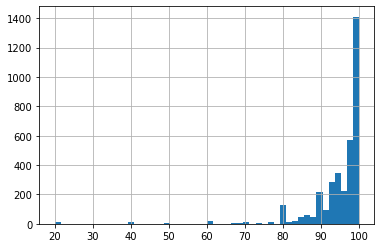

In [1013]:
df_new.review_scores_rating.hist(bins=50);

In [1014]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 5072
Data columns (total 27 columns):
id                             4783 non-null int64
neighbourhood                  4783 non-null object
latitude                       4783 non-null float64
longitude                      4783 non-null float64
price                          4783 non-null int64
number_of_reviews              4783 non-null int64
reviews_per_month              3620 non-null float64
availability_365               4783 non-null int64
accommodates                   4783 non-null int64
bathrooms_text                 4736 non-null float64
bedrooms                       4221 non-null float64
beds                           4709 non-null float64
host_since                     4638 non-null datetime64[ns]
review_scores_rating           3551 non-null float64
room_type                      4783 non-null object
host_is_superhost              4638 non-null object
host_listings_count            4638 non-null float6

In [1015]:
def clean_data(df_new):
    
    # Drop rows with missing salary values
    df_new = df_new.dropna( how='all',
                    subset=['review_scores_rating'])
    
    y = df_new['review_scores_rating']

    #Drop respondent and expected salary columns
    df_new = df_new.drop(['review_scores_rating','latitude', 'longitude', 'id', 'host_since'], axis=1)
    # Fill numeric columns with the mean
    num_vars = df_new.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df_new[col].fillna((df_new[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df_new.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df_new = pd.concat([df_new.drop(var, axis=1), pd.get_dummies(df_new[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df_new
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df_new)

In [1016]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
print(r2_score(y_test, y_test_preds), len(y_test))

0.6805941924176817 1066


In [1017]:
def coef_weights(coefficients, X_train):

    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(30)

,est_int,coefs,abs_coefs
9,review_scores_accuracy,2.878897,2.878897
12,review_scores_communication,2.713204,2.713204
10,review_scores_cleanliness,2.390682,2.390682
14,review_scores_value,2.070477,2.070477
35,neighbourhood_Sendling-Westpark,1.275961,1.275961
38,neighbourhood_Untergiesing-Harlaching,0.966589,0.966589
15,neighbourhood_Altstadt-Lehel,0.934976,0.934976
41,room_type_Shared room,0.915083,0.915083
20,neighbourhood_Feldmoching-Hasenbergl,-0.884752,0.884752
31,neighbourhood_Schwabing-Freimann,0.803696,0.803696


In [1018]:
df_new.groupby('neighbourhood').review_scores_rating.mean().sort_values()

neighbourhood
Moosach                                                   92.615385
Allach-Untermenzing                                       92.896552
Milbertshofen-Am Hart                                     92.965278
Berg am Laim                                              93.186667
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    93.375000
Feldmoching-Hasenbergl                                    93.400000
Hadern                                                    93.439024
Pasing-Obermenzing                                        93.571429
Sendling                                                  94.370079
Maxvorstadt                                               94.390411
Au-Haidhausen                                             94.795652
Ramersdorf-Perlach                                        94.814371
Obergiesing                                               94.884298
Ludwigsvorstadt-Isarvorstadt                              94.885117
Schwanthalerhöhe                  

In [1019]:
df_new.groupby('room_type').review_scores_rating.mean().sort_values()

room_type
Hotel room         91.256410
Shared room        91.607843
Entire home/apt    94.518405
Private room       95.308306
Name: review_scores_rating, dtype: float64

In [1020]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 5072
Data columns (total 27 columns):
id                             4783 non-null int64
neighbourhood                  4783 non-null object
latitude                       4783 non-null float64
longitude                      4783 non-null float64
price                          4783 non-null int64
number_of_reviews              4783 non-null int64
reviews_per_month              3620 non-null float64
availability_365               4783 non-null int64
accommodates                   4783 non-null int64
bathrooms_text                 4736 non-null float64
bedrooms                       4221 non-null float64
beds                           4709 non-null float64
host_since                     4638 non-null datetime64[ns]
review_scores_rating           3551 non-null float64
room_type                      4783 non-null object
host_is_superhost              4638 non-null object
host_listings_count            4638 non-null float6

In [1021]:
df_new.groupby(['neighbourhood', 'room_type']).price.mean()

neighbourhood                                           room_type      
Allach-Untermenzing                                     Entire home/apt     96.533333
                                                        Private room        75.280000
                                                        Shared room         62.000000
Altstadt-Lehel                                          Entire home/apt    123.158879
                                                        Hotel room         106.500000
                                                        Private room        99.872727
Au-Haidhausen                                           Entire home/apt     98.583815
                                                        Hotel room         137.916667
                                                        Private room        71.840708
                                                        Shared room         56.500000
Aubing-Lochhausen-Langwied                              Entire home/

In [1022]:
df_new.groupby('neighbourhood').review_scores_rating.mean()

neighbourhood
Allach-Untermenzing                                       92.896552
Altstadt-Lehel                                            95.982906
Au-Haidhausen                                             94.795652
Aubing-Lochhausen-Langwied                                95.703704
Berg am Laim                                              93.186667
Bogenhausen                                               95.812500
Feldmoching-Hasenbergl                                    93.400000
Hadern                                                    93.439024
Laim                                                      96.297030
Ludwigsvorstadt-Isarvorstadt                              94.885117
Maxvorstadt                                               94.390411
Milbertshofen-Am Hart                                     92.965278
Moosach                                                   92.615385
Neuhausen-Nymphenburg                                     95.492891
Obergiesing                       

In [1023]:
df_new[(df_new.neighbourhood=='Altstadt-Lehel')&(df_new.room_type=='Hotel room')].price.mean()

106.5

In [1024]:
df_new[(df_new.neighbourhood=='Altstadt-Lehel')].review_scores_rating.mean()

95.98290598290598

In [1025]:
df_new.shape[0]

4783

In [1026]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 5072
Data columns (total 27 columns):
id                             4783 non-null int64
neighbourhood                  4783 non-null object
latitude                       4783 non-null float64
longitude                      4783 non-null float64
price                          4783 non-null int64
number_of_reviews              4783 non-null int64
reviews_per_month              3620 non-null float64
availability_365               4783 non-null int64
accommodates                   4783 non-null int64
bathrooms_text                 4736 non-null float64
bedrooms                       4221 non-null float64
beds                           4709 non-null float64
host_since                     4638 non-null datetime64[ns]
review_scores_rating           3551 non-null float64
room_type                      4783 non-null object
host_is_superhost              4638 non-null object
host_listings_count            4638 non-null float6

#### Are there objects that have are undervalued? ####

In [1027]:
df_new = df_new.dropna( how='all',
                    subset=['review_scores_rating'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3551 entries, 0 to 5054
Data columns (total 27 columns):
id                             3551 non-null int64
neighbourhood                  3551 non-null object
latitude                       3551 non-null float64
longitude                      3551 non-null float64
price                          3551 non-null int64
number_of_reviews              3551 non-null int64
reviews_per_month              3551 non-null float64
availability_365               3551 non-null int64
accommodates                   3551 non-null int64
bathrooms_text                 3514 non-null float64
bedrooms                       3148 non-null float64
beds                           3531 non-null float64
host_since                     3446 non-null datetime64[ns]
review_scores_rating           3551 non-null float64
room_type                      3551 non-null object
host_is_superhost              3446 non-null object
host_listings_count            3446 non-null float6

In [1029]:
df_new['bargains'] = 2


In [1039]:
# find listings where the price is below the average but the reviews are better than the average


for x in range(df_new.shape[0]-1):
    col_neighbourhood = df_new['neighbourhood'][x]
    col_room = str(df_new.room_type[x])
    col_price = df_new.price[x]
    col_review_rating = df_new.review_scores_rating[x]
    
    if col_price < df_new[(df_new.neighbourhood==col_neighbourhood)&(df_new.room_type==col_room)].price.mean():        
        
        if col_review_rating > df_new[(df_new.neighbourhood==col_neighbourhood)].review_scores_rating.mean():
            df_new['bargains'][x] = 1
        else:
            df_new['bargains'][x] = 0
    else:
        df_new['bargains'][x] = 0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


KeyError: 9

In [1041]:
df_new[df_new.bargains==1]

,id,neighbourhood,latitude,longitude,price,number_of_reviews,reviews_per_month,availability_365,accommodates,bathrooms_text,bedrooms,beds,host_since,review_scores_rating,room_type,host_is_superhost,host_listings_count,instant_bookable,host_response_time,host_has_profile_pic,host_identity_verified,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,bargains
0,97945,Hadern,48.11476,11.48782,80,129,1.12,5,2,1.0,1.0,1.0,2011-04-18,97.0,Entire home/apt,t,1.0,f,NaN,t,t,10.0,10.0,10.0,10.0,9.0,9.0,1
2,127383,Maxvorstadt,48.15199,11.56482,99,94,0.79,0,4,1.0,1.0,1.0,2011-05-26,98.0,Entire home/apt,t,2.0,f,a few days or more,t,t,10.0,10.0,10.0,10.0,10.0,10.0,1
4,170154,Sendling-Westpark,48.10814,11.52733,55,478,4.12,275,4,1.0,1.0,2.0,2010-04-14,99.0,Private room,t,2.0,f,within a few hours,t,t,10.0,10.0,10.0,10.0,10.0,10.0,1
6,171749,Untergiesing-Harlaching,48.10754,11.57842,35,358,3.04,0,1,1.0,1.0,1.0,2011-07-14,98.0,Private room,t,1.0,f,within a day,t,t,10.0,10.0,10.0,10.0,10.0,10.0,1
7,172672,Schwabing-West,48.16341,11.56366,49,214,2.55,0,2,15.0,1.0,1.0,2011-07-15,97.0,Private room,t,2.0,f,within a few hours,t,t,10.0,10.0,10.0,10.0,10.0,10.0,1
8,179640,Bogenhausen,48.14453,11.63769,35,50,0.43,364,1,NaN,1.0,1.0,2011-07-24,98.0,Private room,f,1.0,f,NaN,t,t,10.0,10.0,10.0,10.0,10.0,10.0,1


In [1045]:
listings[listings.id==127383]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,127383,https://www.airbnb.com/rooms/127383,20210322162337,2021-04-01,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja und ich freue mich net...",a few days or more,0%,85%,t,https://a0.muscache.com/im/users/630556/profil...,https://a0.muscache.com/im/users/630556/profil...,Maxvorstadt,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,NaN,Maxvorstadt,NaN,48.15199,11.56482,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Bed linens"", ""TV"", ""Refrigerat...",$99.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,2021-04-01,94,10,0,2011-06-04,2020-12-30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.79
